In [115]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier

In [116]:
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

In [117]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [118]:
new_data = np.squeeze(dataset['Data'])
new_labels = np.squeeze(dataset['labels'])

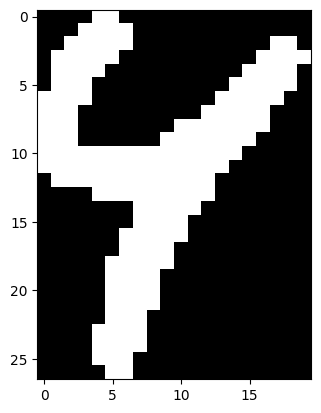

In [119]:
plt.imshow(new_data[0], cmap="gray")

In [120]:
x_train = new_data[:1000]
y_train = new_labels[:1000]
x_test = new_data[1000:1200]
y_test = new_labels[1000:1200]

In [121]:
x_train_5by5 = [cv2.resize(img , dsize=(5,5)) for img in x_train]
x_test_5by5 = [cv2.resize(img , dsize=(5,5)) for img in x_test]

In [122]:
np.shape(x_train_5by5)

(1000, 5, 5)

In [123]:
x_train_reshaped = np.reshape(x_train_5by5, [-1,25])
x_test_reshaped = np.reshape(x_test_5by5, [-1,25])

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_reshaped,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [125]:
sample = 24
test_sample = np.reshape(x_test_reshaped[sample],[1,-1])# or [x_test_reshaped[10]]
predicted_value = knn.predict(test_sample)
print(f"sample is {y_test[sample]} and predicted {predicted_value[0]}")
print(knn.predict_proba(test_sample))


sample is 9 and predicted 9
[[0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.66666667]]


In [126]:
score = knn.score(x_test_reshaped, y_test)
print(f"Accuracy is {100*score:.2f}")


Accuracy is 96.00
